# Training regression models for unhealthy whole blood using 56/100 CpG sites

- This workbook trains the linear, lasso and ridge regression models for the Alzheimer's and Parkinson's cohorts using the 56/100 shared CpG sites from the HC blood XGBoost list
- Data used was created in the whole_blood_applying_hc_models.ipynb notebook and saved as alz_56_no_na.csv and park_56_no_na.csv


In [2]:
import _pickle as cPickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

### Reading in data

In [9]:
parkinsons_df=pd.read_csv('blood/parkinsons/park_blood_top_56.csv',index_col=0)  

In [10]:
alzheimers_df=pd.read_csv('blood/alzheimers/alz_blood_top_56.csv',index_col=0)  

### Defining the models

In [11]:
def lassoCV_regress(X_train,  X_test, y_train,y_test, plot=True, xmin=50,xmax=100,alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],cv=5):

    #Build fit model
    mod = mod = LassoCV(alphas=alphas,cv=cv)
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = (mean_squared_error(y_train, preds_train))**0.5
    rms_test = (mean_squared_error(y_test, preds_test))**0.5
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(15,4))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Lasso Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Lasso Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

In [12]:
def linear_regress(X_train,  X_test, y_train, y_test, plot=True,xmin=50,xmax=100):
    
    #Build fit model
    mod = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs='None')
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = sqrt(mean_squared_error(y_train, preds_train))
    rms_test = sqrt(mean_squared_error(y_test, preds_test))
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot progress over epochs and final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(25,6))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Linear Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Linear Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

In [29]:
def ridge_regress(X_train,  X_test, y_train,y_test, plot=True, xmin=50,xmax=100,alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],cv=5):

    #Build fit model
    mod = Ridge()
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = (mean_squared_error(y_train, preds_train))**0.5
    rms_test = (mean_squared_error(y_test, preds_test))**0.5
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(15,4))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Ridge Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Ridge Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

In [16]:
def mean_impute(data):
    nas=data.isnull().sum()    
    col_means=data.mean(axis=0)
    na_cols=[]
    na_cols_means=[]

    for i in range(len(nas)):
        if nas[i]!=0:        
            na_cols.append(nas.keys()[i])
            na_cols_means.append(col_means[i])
        
    ids=list(data.index)
    for i in ids:
        for j in range(len(na_cols)):
            if str(data.loc[i][na_cols[j]])=="nan":
                data.loc[i][na_cols[j]]=na_cols_means[j]
    
    
    return data

## Alzheimer's

### Test-train split

In [18]:
X_alz = alzheimers_df.iloc[:, 1:]
y_alz = alzheimers_df[['AGE']]
X_train_alz, X_test_alz, Y_train_alz, Y_test_alz = train_test_split(X_alz, y_alz, test_size=0.25, random_state = 4, shuffle=True)

In [19]:
X_train_alz=mean_impute(X_train_alz)
X_test_alz=mean_impute(X_test_alz)

### Linear 

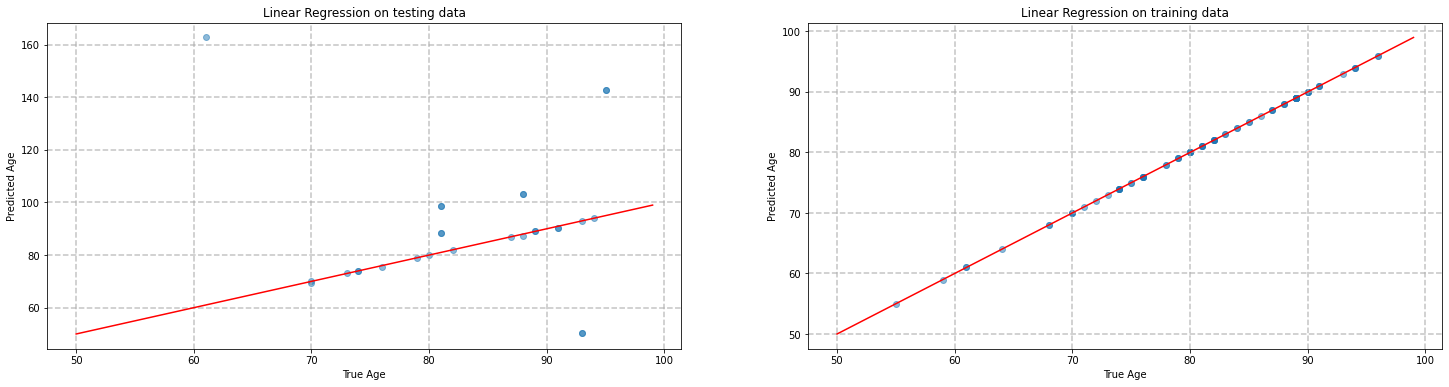

The rms on the training data is 0.000 years
The rms on the testing data is 26.538 years
The r^2 on the training data is 1.000
The r^2 on the testing data is -8.091


(LinearRegression(n_jobs='None'),
 1.2478751613081198e-13,
 26.53765540805883,
 1.0,
 -8.09139927174901)

In [20]:
linear_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz)

### Lasso 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.769619155462141, tolerance: 0.5261030303030303
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7451228629046106, tolerance: 0.5261030303030303
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. Y

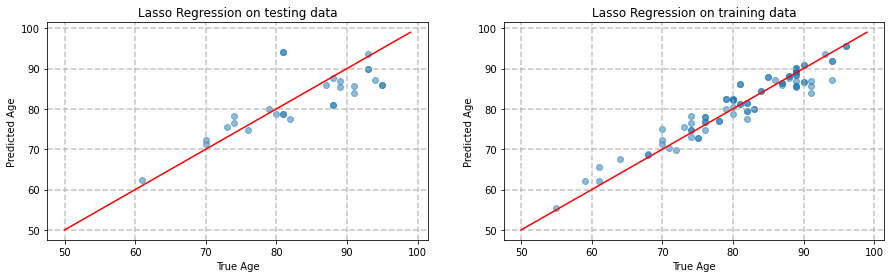

The rms on the training data is 2.522 years
The rms on the testing data is 5.491 years
The r^2 on the training data is 0.919
The r^2 on the testing data is 0.611


(LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                 10000.0, 100000.0],
         cv=5),
 2.5220343832504106,
 5.491193036796755,
 0.9187651434405291,
 0.6107406504352918)

In [21]:
lassoCV_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz)

### Ridge

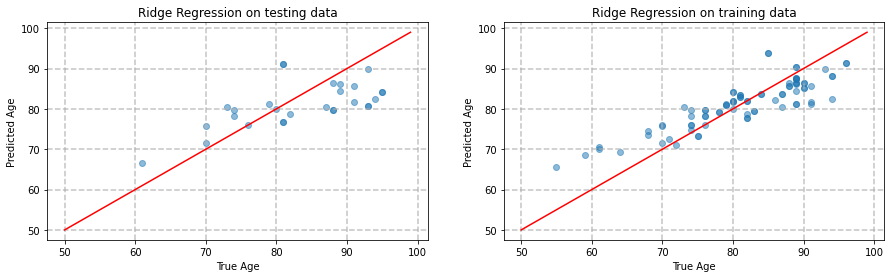

The rms on the training data is 4.689 years
The rms on the testing data is 7.130 years
The r^2 on the training data is 0.719
The r^2 on the testing data is 0.344


(Ridge(),
 4.68855845715926,
 7.129616078796489,
 0.7192504413775352,
 0.34379744219706254)

In [30]:
ridge_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz)

## Parkinson's

### Test-train split

In [24]:
X_park = parkinsons_df.iloc[:, 1:]
y_park = parkinsons_df[['AGE']]
X_train_park, X_test_park, Y_train_park, Y_test_park = train_test_split(X_park, y_park, test_size=0.3, random_state = 4, shuffle=True)

In [25]:
X_train_park=mean_impute(X_train_park)
X_test_park=mean_impute(X_test_park)

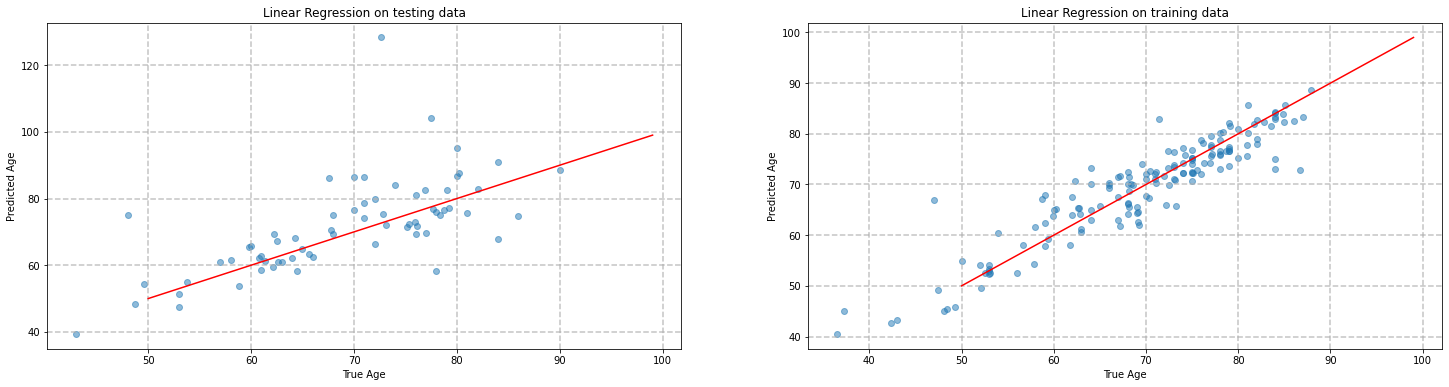

The rms on the training data is 4.062 years
The rms on the testing data is 10.629 years
The r^2 on the training data is 0.858
The r^2 on the testing data is -0.111


(LinearRegression(n_jobs='None'),
 4.061829693209555,
 10.628987822344653,
 0.8584799468581694,
 -0.11117621247128073)

In [26]:
linear_regress(X_train_park, X_test_park, Y_train_park, Y_test_park)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


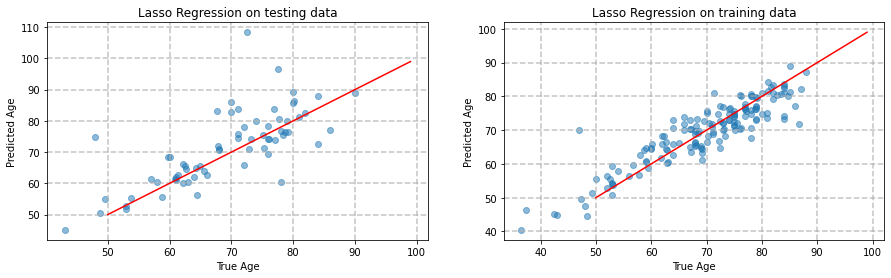

The rms on the training data is 4.552 years
The rms on the testing data is 8.272 years
The r^2 on the training data is 0.822
The r^2 on the testing data is 0.327


(LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                 10000.0, 100000.0],
         cv=5),
 4.551504466276597,
 8.27194407720889,
 0.8223011941790209,
 0.3270011903303899)

In [27]:
lassoCV_regress(X_train_park, X_test_park, Y_train_park, Y_test_park)

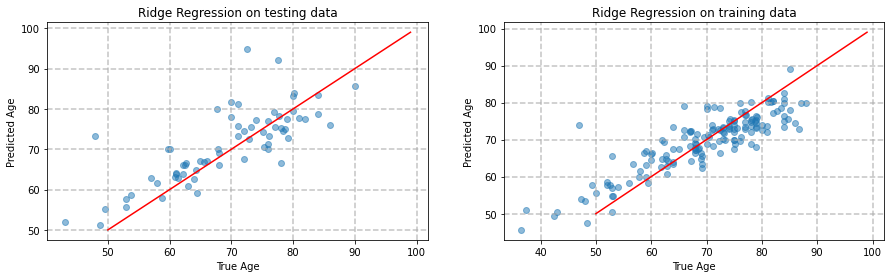

The rms on the training data is 5.575 years
The rms on the testing data is 6.625 years
The r^2 on the training data is 0.733
The r^2 on the testing data is 0.568


(Ridge(),
 5.574995549191053,
 6.624811202937914,
 0.7333978712682567,
 0.5683357037917581)

In [31]:
ridge_regress(X_train_park, X_test_park, Y_train_park, Y_test_park)